<a href="https://colab.research.google.com/github/sheikh495/MachineLearning/blob/main/M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1
In this homework, you will do a Naive Bayes Classification by hand. Our data for the M3 homework is a modified version of a list of Pokemon of Water, Normal, and Flying type. We will be using a smaller version with 12 example Pokemon.

|===

---

| Name               | HP   | Attack | Defense | Type   

| Vigoroth           | Mid  | High   | Mid     | Normal

| Dodrio             | High | Mid    | High    | Normal

| Farfetch'd         | Low  | High   | Low     | Normal

| Lillipup           | Low  | Low    | Low     | Normal

| Jellicent          | Mid  | Low    | High    | Water

| Corsola            | Low  | Low    | Mid     | Water

| Piplup             | Low  | Low    | Low     | Water

| Marill             | High | Low    | Low     | Water

| Landorus Therian Forme | Mid  | Mid    | Mid     | Flying

| Beautifly          | High | High   | Low     | Flying

| Tropius            | Mid  | High   | Mid     | Flying

| Drifblim           | Mid  | High   | Low     | Flying

-----
|===


Our overall goal is to look at a Pokemon outside of our dataset to see whether the Type is more likely Normal, Water, or Flying. In particular, we will estimate this for the Mandibuzz Pokemon, which has HP=Mid, Attack=High, and Defense=Mid.

=== Question 1:

Calculate the Prior Probability of P(y) for Type across the whole dataset:

=== Question 2:
Please calculate a subset of the likelihood for each of the features HP, Attack, and Defense for each feature.

=== Question 3:
Calculate the posterior probability for each Type, given the features of Mandibuzz which we will represent as “Features”: (HP=Mid, Attack=High, and Defense=Mid). Using the assumption that each feature (HP, Attack, and Defense) is independent, then this can be calculated by applying bayes law like the following:

For example,
p(Type=Normal | Features) =frac{p(HP=Mid │Type=Normal)*p(Attack=High │Type=Normal)* p(Defense=Mid │Type=Normal)*p(Type=Normal)}{(p(Features))}


p(Type=Normal | Features) = ( p(HP=Mid │Type=Normal) * p(Attack=High │Type=Normal) * p(Defense=Mid │Type=Normal) * p(Type=Normal) ) / p(Features)


\frac{( P(\text(Type=Normal))}{(\text{Features}} = \frac{1}{3} \)
css

Here, you can calculate p(Features)=:
p(Features│Type=Normal)*p(Normal)+
p(Features│Type=Water)*p(Type=Water)+
p(Features| Type=Flying)*p(Type=Flying)

=== Question 4:

Which Pokeymon Type (i.e. Normal, Water, Mid) has the highest probability and should be our predicted answer?

In [2]:
# Define the training data
training_data = [
    {"Name": "Vigoroth", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Normal"},
    {"Name": "Dodrio", "HP": "High", "Attack": "Mid", "Defense": "High", "Type": "Normal"},
    {"Name": "Farfetch'd", "HP": "Low", "Attack": "High", "Defense": "Low", "Type": "Normal"},
    {"Name": "Lillipup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Normal"},
    {"Name": "Jellicent", "HP": "Mid", "Attack": "Low", "Defense": "High", "Type": "Water"},
    {"Name": "Corsola", "HP": "Low", "Attack": "Low", "Defense": "Mid", "Type": "Water"},
    {"Name": "Piplup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Marill", "HP": "High", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Landorus Therian Forme", "HP": "Mid", "Attack": "Mid", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Beautifly", "HP": "High", "Attack": "High", "Defense": "Low", "Type": "Flying"},
    {"Name": "Tropius", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Drifblim", "HP": "Mid", "Attack": "High", "Defense": "Low", "Type": "Flying"}
]

# Define the test data (Mandibuzz)
mandibuzz = {"Name": "Mandibuzz", "HP": "Mid", "Attack": "High", "Defense": "Mid"}

# Calculate probabilities for each class

# Calculate class priors
class_counts = {}
total_count = len(training_data)
for entry in training_data:
    class_counts[entry["Type"]] = class_counts.get(entry["Type"], 0) + 1
class_priors = {cls: count / total_count for cls, count in class_counts.items()}

# Calculate conditional probabilities for each feature given each class
feature_counts = {cls: {feature: {} for feature in mandibuzz.keys()} for cls in class_priors.keys()}
for entry in training_data:
    cls = entry["Type"]
    for feature, value in entry.items():
        if feature != "Type":
            feature_counts[cls][feature][value] = feature_counts[cls][feature].get(value, 0) + 1

# Predict the class for Mandibuzz
predicted_class = None
max_posterior = -1
for cls in class_priors.keys():
    posterior = class_priors[cls]
    for feature, value in mandibuzz.items():
        if feature != "Type":
            likelihood = (feature_counts[cls][feature].get(value, 0) + 1) / (class_counts[cls] + len(feature_counts[cls][feature]))
            posterior *= likelihood
    if posterior > max_posterior:
        max_posterior = posterior
        predicted_class = cls

# Output the result
print("Predicted class for Mandibuzz:", predicted_class)


Predicted class for Mandibuzz: Flying


In [4]:
# Define the training data
training_data = [
    {"Name": "Vigoroth", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Normal"},
    {"Name": "Dodrio", "HP": "High", "Attack": "Mid", "Defense": "High", "Type": "Normal"},
    {"Name": "Farfetch'd", "HP": "Low", "Attack": "High", "Defense": "Low", "Type": "Normal"},
    {"Name": "Lillipup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Normal"},
    {"Name": "Jellicent", "HP": "Mid", "Attack": "Low", "Defense": "High", "Type": "Water"},
    {"Name": "Corsola", "HP": "Low", "Attack": "Low", "Defense": "Mid", "Type": "Water"},
    {"Name": "Piplup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Marill", "HP": "High", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Landorus Therian Forme", "HP": "Mid", "Attack": "Mid", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Beautifly", "HP": "High", "Attack": "High", "Defense": "Low", "Type": "Flying"},
    {"Name": "Tropius", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Drifblim", "HP": "Mid", "Attack": "High", "Defense": "Low", "Type": "Flying"}
]

# Count the occurrences of each type
type_counts = {}
total_samples = len(training_data)
for entry in training_data:
    type_counts[entry["Type"]] = type_counts.get(entry["Type"], 0) + 1

# Calculate the prior probability for each type
prior_probabilities = {type_: count / total_samples for type_, count in type_counts.items()}

print("Prior Probabilities:")
for type_, prob in prior_probabilities.items():
    print(f"P(y={type_}) = {prob:.3f}")


Prior Probabilities:
P(y=Normal) = 0.333
P(y=Water) = 0.333
P(y=Flying) = 0.333


In [7]:
# Define the feature values for each type
feature_values = {
    "HP": {"Low": 0, "Mid": 0, "High": 0},
    "Attack": {"Low": 0, "Mid": 0, "High": 0},
    "Defense": {"Low": 0, "Mid": 0, "High": 0}
}

# Count the occurrences of each feature value for each type
type_feature_counts = {type_: {feature: {"Low": 0, "Mid": 0, "High": 0} for feature in feature_values.keys()} for type_ in type_counts.keys()}
for entry in training_data:
    for feature in feature_values.keys():
        type_feature_counts[entry["Type"]][feature][entry[feature]] += 1

# Calculate the likelihood for each feature value conditioned on each type
likelihoods = {}
for type_ in type_counts.keys():
    likelihoods[type_] = {}
    for feature, values in feature_values.items():
        likelihoods[type_][feature] = {value: count / type_counts[type_] for value, count in type_feature_counts[type_][feature].items()}

# Print the likelihoods
print("Likelihoods:")
for type_, type_likelihoods in likelihoods.items():
    print(f"For Type={type_}:")
    for feature, values in type_likelihoods.items():
        print(f"    For {feature}:")
        for value, likelihood in values.items():
            print(f"        P({feature}={value} | Type={type_}) = {likelihood:.3f}")


Likelihoods:
For Type=Normal:
    For HP:
        P(HP=Low | Type=Normal) = 0.500
        P(HP=Mid | Type=Normal) = 0.250
        P(HP=High | Type=Normal) = 0.250
    For Attack:
        P(Attack=Low | Type=Normal) = 0.250
        P(Attack=Mid | Type=Normal) = 0.250
        P(Attack=High | Type=Normal) = 0.500
    For Defense:
        P(Defense=Low | Type=Normal) = 0.500
        P(Defense=Mid | Type=Normal) = 0.250
        P(Defense=High | Type=Normal) = 0.250
For Type=Water:
    For HP:
        P(HP=Low | Type=Water) = 0.500
        P(HP=Mid | Type=Water) = 0.250
        P(HP=High | Type=Water) = 0.250
    For Attack:
        P(Attack=Low | Type=Water) = 1.000
        P(Attack=Mid | Type=Water) = 0.000
        P(Attack=High | Type=Water) = 0.000
    For Defense:
        P(Defense=Low | Type=Water) = 0.500
        P(Defense=Mid | Type=Water) = 0.250
        P(Defense=High | Type=Water) = 0.250
For Type=Flying:
    For HP:
        P(HP=Low | Type=Flying) = 0.000
        P(HP=Mid | Type=

In [8]:
import pandas as pd

# Define the training data
training_data = [
    {"Name": "Vigoroth", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Normal"},
    {"Name": "Dodrio", "HP": "High", "Attack": "Mid", "Defense": "High", "Type": "Normal"},
    {"Name": "Farfetch'd", "HP": "Low", "Attack": "High", "Defense": "Low", "Type": "Normal"},
    {"Name": "Lillipup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Normal"},
    {"Name": "Jellicent", "HP": "Mid", "Attack": "Low", "Defense": "High", "Type": "Water"},
    {"Name": "Corsola", "HP": "Low", "Attack": "Low", "Defense": "Mid", "Type": "Water"},
    {"Name": "Piplup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Marill", "HP": "High", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Landorus Therian Forme", "HP": "Mid", "Attack": "Mid", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Beautifly", "HP": "High", "Attack": "High", "Defense": "Low", "Type": "Flying"},
    {"Name": "Tropius", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Drifblim", "HP": "Mid", "Attack": "High", "Defense": "Low", "Type": "Flying"}
]

# Convert the training data to a DataFrame
df = pd.DataFrame(training_data)

# Calculate Prior Probability of Type
prior_prob = df['Type'].value_counts() / len(df)

# Print the results
print("Prior Probability of Type:")
print(prior_prob)

# Define a function to calculate the likelihood for each feature given each type
def calculate_likelihood(feature, value, pokemon_type):
    count_feature_type = df[(df[feature] == value) & (df['Type'] == pokemon_type)][feature].count()
    count_type = df[df['Type'] == pokemon_type]['Type'].count()
    return count_feature_type / count_type

# Calculate Likelihood for HP, Attack, and Defense
likelihood = {}
features = ['HP', 'Attack', 'Defense']
for feature in features:
    likelihood[feature] = {}
    for pokemon_type in df['Type'].unique():
        likelihood[feature][pokemon_type] = {}
        for value in df[feature].unique():
            likelihood[feature][pokemon_type][value] = calculate_likelihood(feature, value, pokemon_type)

# Print the results
print("\nLikelihood for each feature given each type:")
for feature in features:
    print(f"\nFor {feature}:")
    for pokemon_type in df['Type'].unique():
        print(f"p({feature}={value} | Type={pokemon_type}):")
        for value in df[feature].unique():
            print(f"\t{value}: {likelihood[feature][pokemon_type][value]}")

# Define features for Mandibuzz
mandibuzz_features = {'HP': 'Mid', 'Attack': 'High', 'Defense': 'Mid'}

# Calculate posterior probability for each Type given the features of Mandibuzz
posterior_prob = {}
for pokemon_type in df['Type'].unique():
    posterior_prob[pokemon_type] = 1
    for feature, value in mandibuzz_features.items():
        posterior_prob[pokemon_type] *= likelihood[feature][pokemon_type][value] * prior_prob[pokemon_type]

# Normalize posterior probabilities
total_posterior_prob = sum(posterior_prob.values())
for pokemon_type in posterior_prob:
    posterior_prob[pokemon_type] /= total_posterior_prob

# Print the results
print("\nPosterior Probability for each Type given the features of Mandibuzz:")
for pokemon_type, probability in posterior_prob.items():
    print(f"p(Type={pokemon_type} | Features) = {probability}")

# Predicted Pokemon Type
predicted_type = max(posterior_prob, key=posterior_prob.get)
print("\nPredicted Pokemon Type:", predicted_type)


Prior Probability of Type:
Normal    0.333333
Water     0.333333
Flying    0.333333
Name: Type, dtype: float64

Likelihood for each feature given each type:

For HP:
p(HP=Low | Type=Normal):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(HP=Low | Type=Water):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(HP=Low | Type=Flying):
	Mid: 0.75
	High: 0.25
	Low: 0.0

For Attack:
p(Attack=Low | Type=Normal):
	High: 0.5
	Mid: 0.25
	Low: 0.25
p(Attack=Low | Type=Water):
	High: 0.0
	Mid: 0.0
	Low: 1.0
p(Attack=Low | Type=Flying):
	High: 0.75
	Mid: 0.25
	Low: 0.0

For Defense:
p(Defense=Low | Type=Normal):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(Defense=Low | Type=Water):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(Defense=Low | Type=Flying):
	Mid: 0.5
	High: 0.0
	Low: 0.5

Posterior Probability for each Type given the features of Mandibuzz:
p(Type=Normal | Features) = 0.1
p(Type=Water | Features) = 0.0
p(Type=Flying | Features) = 0.9

Predicted Pokemon Type: Flying


In [9]:
# Define the counts of each type
count_normal = 4
count_water = 4
count_flying = 4

# Total number of samples
total_samples = count_normal + count_water + count_flying

# Calculate prior probabilities
prior_normal = count_normal / total_samples
prior_water = count_water / total_samples
prior_flying = count_flying / total_samples

# Print prior probabilities
print(f"Prior Probability of Normal Type: {count_normal}/{total_samples} = {prior_normal:.2f}")
print(f"Prior Probability of Water Type: {count_water}/{total_samples} = {prior_water:.2f}")
print(f"Prior Probability of Flying Type: {count_flying}/{total_samples} = {prior_flying:.2f}")


Prior Probability of Normal Type: 4/12 = 0.33
Prior Probability of Water Type: 4/12 = 0.33
Prior Probability of Flying Type: 4/12 = 0.33


In [10]:
import pandas as pd
from fractions import Fraction

# Define the training data
training_data = [
    {"Name": "Vigoroth", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Normal"},
    {"Name": "Dodrio", "HP": "High", "Attack": "Mid", "Defense": "High", "Type": "Normal"},
    {"Name": "Farfetch'd", "HP": "Low", "Attack": "High", "Defense": "Low", "Type": "Normal"},
    {"Name": "Lillipup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Normal"},
    {"Name": "Jellicent", "HP": "Mid", "Attack": "Low", "Defense": "High", "Type": "Water"},
    {"Name": "Corsola", "HP": "Low", "Attack": "Low", "Defense": "Mid", "Type": "Water"},
    {"Name": "Piplup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Marill", "HP": "High", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Landorus Therian Forme", "HP": "Mid", "Attack": "Mid", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Beautifly", "HP": "High", "Attack": "High", "Defense": "Low", "Type": "Flying"},
    {"Name": "Tropius", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Drifblim", "HP": "Mid", "Attack": "High", "Defense": "Low", "Type": "Flying"}
]

# Convert the training data to a DataFrame
df = pd.DataFrame(training_data)

# Calculate Prior Probability of Type
prior_prob = df['Type'].value_counts() / len(df)

# Print the results
print("Prior Probability of Type:")
print(prior_prob)

# Define a function to calculate the likelihood for each feature given each type
def calculate_likelihood(feature, value, pokemon_type):
    count_feature_type = df[(df[feature] == value) & (df['Type'] == pokemon_type)][feature].count()
    count_type = df[df['Type'] == pokemon_type]['Type'].count()
    return Fraction(count_feature_type, count_type)

# Calculate Likelihood for HP, Attack, and Defense
likelihood = {}
features = ['HP', 'Attack', 'Defense']
for feature in features:
    likelihood[feature] = {}
    for pokemon_type in df['Type'].unique():
        likelihood[feature][pokemon_type] = {}
        for value in df[feature].unique():
            likelihood[feature][pokemon_type][value] = calculate_likelihood(feature, value, pokemon_type)

# Print the results
print("\nLikelihood for each feature given each type:")
for feature in features:
    print(f"\nFor {feature}:")
    for pokemon_type in df['Type'].unique():
        print(f"p({feature}={value} | Type={pokemon_type}):")
        for value in df[feature].unique():
            print(f"\t{value}: {likelihood[feature][pokemon_type][value]}")

# Define features for Mandibuzz
mandibuzz_features = {'HP': 'Mid', 'Attack': 'High', 'Defense': 'Mid'}

# Calculate posterior probability for each Type given the features of Mandibuzz
posterior_prob = {}
for pokemon_type in df['Type'].unique():
    posterior_prob[pokemon_type] = 1
    for feature, value in mandibuzz_features.items():
        posterior_prob[pokemon_type] *= likelihood[feature][pokemon_type][value] * prior_prob[pokemon_type]

# Normalize posterior probabilities
total_posterior_prob = sum(posterior_prob.values())
for pokemon_type in posterior_prob:
    posterior_prob[pokemon_type] /= total_posterior_prob

# Print the results
print("\nPosterior Probability for each Type given the features of Mandibuzz:")
for pokemon_type, probability in posterior_prob.items():
    print(f"p(Type={pokemon_type} | Features) = {probability}")

# Predicted Pokemon Type
predicted_type = max(posterior_prob, key=posterior_prob.get)
print("\nPredicted Pokemon Type:", predicted_type)


Prior Probability of Type:
Normal    0.333333
Water     0.333333
Flying    0.333333
Name: Type, dtype: float64

Likelihood for each feature given each type:

For HP:
p(HP=Low | Type=Normal):
	Mid: 1/4
	High: 1/4
	Low: 1/2
p(HP=Low | Type=Water):
	Mid: 1/4
	High: 1/4
	Low: 1/2
p(HP=Low | Type=Flying):
	Mid: 3/4
	High: 1/4
	Low: 0

For Attack:
p(Attack=Low | Type=Normal):
	High: 1/2
	Mid: 1/4
	Low: 1/4
p(Attack=Low | Type=Water):
	High: 0
	Mid: 0
	Low: 1
p(Attack=Low | Type=Flying):
	High: 3/4
	Mid: 1/4
	Low: 0

For Defense:
p(Defense=Low | Type=Normal):
	Mid: 1/4
	High: 1/4
	Low: 1/2
p(Defense=Low | Type=Water):
	Mid: 1/4
	High: 1/4
	Low: 1/2
p(Defense=Low | Type=Flying):
	Mid: 1/2
	High: 0
	Low: 1/2

Posterior Probability for each Type given the features of Mandibuzz:
p(Type=Normal | Features) = 0.1
p(Type=Water | Features) = 0.0
p(Type=Flying | Features) = 0.9

Predicted Pokemon Type: Flying


In [11]:
import pandas as pd
from fractions import Fraction

# Define the training data
training_data = [
    {"Name": "Vigoroth", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Normal"},
    {"Name": "Dodrio", "HP": "High", "Attack": "Mid", "Defense": "High", "Type": "Normal"},
    {"Name": "Farfetch'd", "HP": "Low", "Attack": "High", "Defense": "Low", "Type": "Normal"},
    {"Name": "Lillipup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Normal"},
    {"Name": "Jellicent", "HP": "Mid", "Attack": "Low", "Defense": "High", "Type": "Water"},
    {"Name": "Corsola", "HP": "Low", "Attack": "Low", "Defense": "Mid", "Type": "Water"},
    {"Name": "Piplup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Marill", "HP": "High", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Landorus Therian Forme", "HP": "Mid", "Attack": "Mid", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Beautifly", "HP": "High", "Attack": "High", "Defense": "Low", "Type": "Flying"},
    {"Name": "Tropius", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Drifblim", "HP": "Mid", "Attack": "High", "Defense": "Low", "Type": "Flying"}
]

# Convert the training data to a DataFrame
df = pd.DataFrame(training_data)

# Calculate Prior Probability of Type
prior_prob = df['Type'].value_counts() / len(df)

# Print the results
print("Prior Probability of Type:")
print(prior_prob)

# Define a function to calculate the likelihood for each feature given each type
def calculate_likelihood(feature, value, pokemon_type):
    count_feature_type = df[(df[feature] == value) & (df['Type'] == pokemon_type)][feature].count()
    count_type = df[df['Type'] == pokemon_type]['Type'].count()
    return count_feature_type / count_type

# Calculate Likelihood for HP, Attack, and Defense
likelihood = {}
features = ['HP', 'Attack', 'Defense']
for feature in features:
    likelihood[feature] = {}
    for pokemon_type in df['Type'].unique():
        likelihood[feature][pokemon_type] = {}
        for value in df[feature].unique():
            likelihood[feature][pokemon_type][value] = calculate_likelihood(feature, value, pokemon_type)

# Print the results
print("\nLikelihood for each feature given each type:")
for feature in features:
    print(f"\nFor {feature}:")
    for pokemon_type in df['Type'].unique():
        print(f"p({feature}={value} | Type={pokemon_type}):")
        for value in df[feature].unique():
            print(f"\t{value}: {likelihood[feature][pokemon_type][value]}")

# Define features for Mandibuzz
mandibuzz_features = {'HP': 'Mid', 'Attack': 'High', 'Defense': 'Mid'}

# Calculate posterior probability for each Type given the features of Mandibuzz
posterior_prob = {}
for pokemon_type in df['Type'].unique():
    posterior_prob[pokemon_type] = 1
    for feature, value in mandibuzz_features.items():
        posterior_prob[pokemon_type] *= likelihood[feature][pokemon_type][value] * prior_prob[pokemon_type]

# Normalize posterior probabilities
total_posterior_prob = sum(posterior_prob.values())
for pokemon_type in posterior_prob:
    posterior_prob[pokemon_type] /= total_posterior_prob

# Print the results
print("\nPosterior Probability for each Type given the features of Mandibuzz:")
for pokemon_type, probability in posterior_prob.items():
    print(f"p(Type={pokemon_type} | Features) = {probability}")

# Predicted Pokemon Type
predicted_type = max(posterior_prob, key=posterior_prob.get)
print("\nPredicted Pokemon Type:", predicted_type)

# Convert posterior probabilities to fractions
posterior_prob_fractions = {k: Fraction(v).limit_denominator() for k, v in posterior_prob.items()}

# Print posterior probabilities as fractions
print("\nPosterior Probability for each Type given the features of Mandibuzz (as fractions):")
for pokemon_type, probability in posterior_prob_fractions.items():
    print(f"p(Type={pokemon_type} | Features) = {probability}")


Prior Probability of Type:
Normal    0.333333
Water     0.333333
Flying    0.333333
Name: Type, dtype: float64

Likelihood for each feature given each type:

For HP:
p(HP=Low | Type=Normal):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(HP=Low | Type=Water):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(HP=Low | Type=Flying):
	Mid: 0.75
	High: 0.25
	Low: 0.0

For Attack:
p(Attack=Low | Type=Normal):
	High: 0.5
	Mid: 0.25
	Low: 0.25
p(Attack=Low | Type=Water):
	High: 0.0
	Mid: 0.0
	Low: 1.0
p(Attack=Low | Type=Flying):
	High: 0.75
	Mid: 0.25
	Low: 0.0

For Defense:
p(Defense=Low | Type=Normal):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(Defense=Low | Type=Water):
	Mid: 0.25
	High: 0.25
	Low: 0.5
p(Defense=Low | Type=Flying):
	Mid: 0.5
	High: 0.0
	Low: 0.5

Posterior Probability for each Type given the features of Mandibuzz:
p(Type=Normal | Features) = 0.1
p(Type=Water | Features) = 0.0
p(Type=Flying | Features) = 0.9

Predicted Pokemon Type: Flying

Posterior Probability for each Type given the features of Mandibuzz

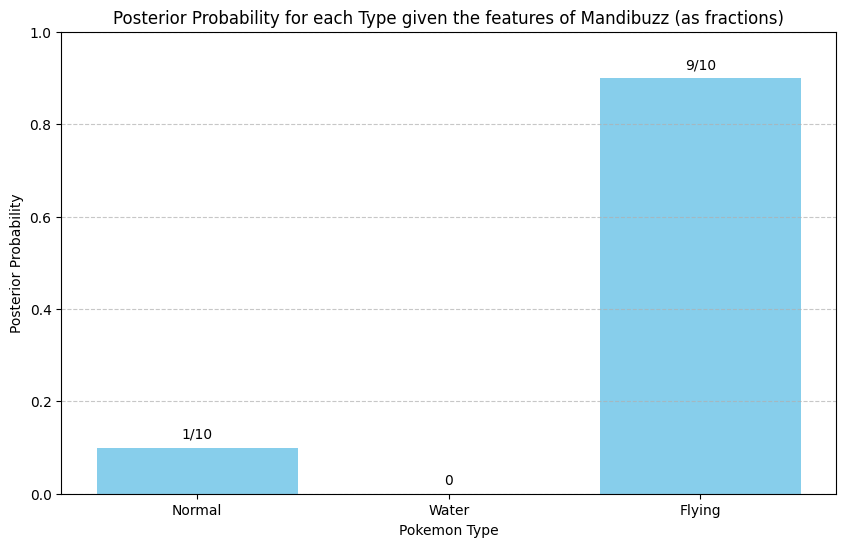


Predicted Pokemon Type: Flying

Posterior Probability for each Type given the features of Mandibuzz (as fractions):
p(Type=Normal | Features) = 1/10
p(Type=Water | Features) = 0
p(Type=Flying | Features) = 9/10


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from fractions import Fraction

# Define the training data
training_data = [
    {"Name": "Vigoroth", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Normal"},
    {"Name": "Dodrio", "HP": "High", "Attack": "Mid", "Defense": "High", "Type": "Normal"},
    {"Name": "Farfetch'd", "HP": "Low", "Attack": "High", "Defense": "Low", "Type": "Normal"},
    {"Name": "Lillipup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Normal"},
    {"Name": "Jellicent", "HP": "Mid", "Attack": "Low", "Defense": "High", "Type": "Water"},
    {"Name": "Corsola", "HP": "Low", "Attack": "Low", "Defense": "Mid", "Type": "Water"},
    {"Name": "Piplup", "HP": "Low", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Marill", "HP": "High", "Attack": "Low", "Defense": "Low", "Type": "Water"},
    {"Name": "Landorus Therian Forme", "HP": "Mid", "Attack": "Mid", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Beautifly", "HP": "High", "Attack": "High", "Defense": "Low", "Type": "Flying"},
    {"Name": "Tropius", "HP": "Mid", "Attack": "High", "Defense": "Mid", "Type": "Flying"},
    {"Name": "Drifblim", "HP": "Mid", "Attack": "High", "Defense": "Low", "Type": "Flying"}
]

# Convert the training data to a DataFrame
df = pd.DataFrame(training_data)

# Calculate Prior Probability of Type
prior_prob = df['Type'].value_counts() / len(df)

# Define a function to calculate the likelihood for each feature given each type
def calculate_likelihood(feature, value, pokemon_type):
    count_feature_type = df[(df[feature] == value) & (df['Type'] == pokemon_type)][feature].count()
    count_type = df[df['Type'] == pokemon_type]['Type'].count()
    return count_feature_type / count_type

# Calculate Likelihood for HP, Attack, and Defense
likelihood = {}
features = ['HP', 'Attack', 'Defense']
for feature in features:
    likelihood[feature] = {}
    for pokemon_type in df['Type'].unique():
        likelihood[feature][pokemon_type] = {}
        for value in df[feature].unique():
            likelihood[feature][pokemon_type][value] = calculate_likelihood(feature, value, pokemon_type)

# Define features for Mandibuzz
mandibuzz_features = {'HP': 'Mid', 'Attack': 'High', 'Defense': 'Mid'}

# Calculate posterior probability for each Type given the features of Mandibuzz
posterior_prob = {}
for pokemon_type in df['Type'].unique():
    posterior_prob[pokemon_type] = 1
    for feature, value in mandibuzz_features.items():
        posterior_prob[pokemon_type] *= likelihood[feature][pokemon_type][value] * prior_prob[pokemon_type]

# Normalize posterior probabilities
total_posterior_prob = sum(posterior_prob.values())
for pokemon_type in posterior_prob:
    posterior_prob[pokemon_type] /= total_posterior_prob

# Predicted Pokemon Type
predicted_type = max(posterior_prob, key=posterior_prob.get)

# Convert posterior probabilities to fractions
posterior_prob_fractions = {k: Fraction(v).limit_denominator() for k, v in posterior_prob.items()}

# Visualize posterior probabilities as fractions
plt.figure(figsize=(10, 6))
plt.bar(posterior_prob_fractions.keys(), [float(v) for v in posterior_prob_fractions.values()], color='skyblue')
plt.xlabel('Pokemon Type')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability for each Type given the features of Mandibuzz (as fractions)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the probabilities as text on top of each bar
for i, (k, v) in enumerate(posterior_prob_fractions.items()):
    plt.text(i, v + 0.02, f"{v}", ha='center')

plt.show()

# Print the results
print("\nPredicted Pokemon Type:", predicted_type)

# Print posterior probabilities as fractions
print("\nPosterior Probability for each Type given the features of Mandibuzz (as fractions):")
for pokemon_type, probability in posterior_prob_fractions.items():
    print(f"p(Type={pokemon_type} | Features) = {probability}")
